In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
weather_t = pd.read_csv("data/weather_data/weather_exceptional_months_bin.csv")
price_data = pd.read_csv("rangedata_commodities_monthly_outlier_counts.csv")

In [58]:
print(weather_t["YEAR"].max())
print(weather_t["YEAR"].min())
weather_t = weather_t[weather_t['YEAR']<=2017]
weather_t.head(10)

2021
1992


,YEAR,MONTH,colder,hotter,wetter,drier
0,1992,1,0,0,0,0
1,1992,2,0,0,0,0
2,1992,3,0,0,0,0
3,1992,4,0,0,0,0
4,1992,5,0,0,0,1
5,1992,6,0,0,0,1
6,1992,7,0,0,1,0
7,1992,8,1,0,0,0
8,1992,9,0,0,0,0
9,1992,10,0,0,0,0


In [59]:
price_data.head(10)

,Unnamed: 0,Total_Outliers,Positive_Outliers,Negative_Outliers
0,1992-02-01,1,0.0,1.0
1,1992-03-01,1,0.0,1.0
2,1992-06-01,1,0.0,1.0
3,1992-07-01,4,3.0,1.0
4,1992-08-01,3,0.0,3.0
5,1992-09-01,4,1.0,3.0
6,1992-11-01,1,1.0,0.0
7,1992-12-01,1,1.0,0.0
8,1993-07-01,6,4.0,2.0
9,1993-08-01,2,0.0,2.0


In [60]:
price = price_data.copy()

price['DATE'] = pd.to_datetime(price['Unnamed: 0'])
price['YEAR'] = price['DATE'].dt.year
price['MONTH'] = price['DATE'].dt.month

price = price[["YEAR","MONTH","Positive_Outliers","Negative_Outliers"]]
print(price["YEAR"].max())
print(price["YEAR"].min())              
price.head()



2017
1992


,YEAR,MONTH,Positive_Outliers,Negative_Outliers
0,1992,2,0.0,1.0
1,1992,3,0.0,1.0
2,1992,6,0.0,1.0
3,1992,7,3.0,1.0
4,1992,8,0.0,3.0


In [61]:
all_months = pd.DataFrame([
    {'YEAR': year, 'MONTH': month}
    for year in range(price["YEAR"].min(), price["YEAR"].max())
    for month in range(1, 13)
])

prices_t = pd.merge(all_months, price, on=['YEAR', 'MONTH'], how='left')
prices_t['Positive_Outliers'] = prices_t['Positive_Outliers'].fillna(0).astype(int)
prices_t['Negative_Outliers'] = prices_t['Negative_Outliers'].fillna(0).astype(int)

# Fill other missing columns if needed
prices_t = prices_t.fillna(0)

# Sort by YEAR and MONTH
prices_t = prices_t.sort_values(by=['YEAR', 'MONTH']).reset_index(drop=True)

prices_t.head(20)

,YEAR,MONTH,Positive_Outliers,Negative_Outliers
0,1992,1,0,0
1,1992,2,0,1
2,1992,3,0,1
3,1992,4,0,0
4,1992,5,0,0
5,1992,6,0,1
6,1992,7,3,1
7,1992,8,0,3
8,1992,9,1,3
9,1992,10,0,0


In [65]:
prices = prices_t.copy()
quartiles = prices[['Positive_Outliers', 'Negative_Outliers']].quantile(0.90)
prices['positive'] = np.where(prices['Positive_Outliers'] >= quartiles['Positive_Outliers'] , 1, 0)
prices['negative'] = np.where(prices['Negative_Outliers'] >= quartiles['Negative_Outliers'] , 1, 0)
prices = prices[["YEAR","MONTH","positive","negative"]]
prices['LABEL'] = np.where(prices['MONTH'] == 1, prices['YEAR'].astype(str), "")
prices['DATE'] = prices['MONTH'].astype(str) + "_" + prices['YEAR'].astype(str)
prices.head(20)

,YEAR,MONTH,positive,negative,LABEL,DATE
0,1992,1,0,0,1992,1_1992
1,1992,2,0,0,,2_1992
2,1992,3,0,0,,3_1992
3,1992,4,0,0,,4_1992
4,1992,5,0,0,,5_1992
5,1992,6,0,0,,6_1992
6,1992,7,1,0,,7_1992
7,1992,8,0,1,,8_1992
8,1992,9,0,1,,9_1992
9,1992,10,0,0,,10_1992


In [64]:
weather = pd.merge(all_months, weather_t, on=['YEAR', 'MONTH'], how='left')
weather['wetter'] = weather['wetter'].fillna(0).astype(int)
weather['drier'] = weather['drier'].fillna(0).astype(int)
weather['hotter'] = weather['hotter'].fillna(0).astype(int)
weather['colder'] = weather['colder'].fillna(0).astype(int)
weather = weather.fillna(0)
weather = weather.sort_values(by=['YEAR', 'MONTH']).reset_index(drop=True)
weather['LABEL'] = np.where(weather['MONTH'] == 1, weather['YEAR'].astype(str), "")
weather['DATE'] = weather['MONTH'].astype(str) + "_" + weather['YEAR'].astype(str)
weather.head(20)

,YEAR,MONTH,colder,hotter,wetter,drier,LABEL,DATE
0,1992,1,0,0,0,0,1992,1_1992
1,1992,2,0,0,0,0,,2_1992
2,1992,3,0,0,0,0,,3_1992
3,1992,4,0,0,0,0,,4_1992
4,1992,5,0,0,0,1,,5_1992
5,1992,6,0,0,0,1,,6_1992
6,1992,7,0,0,1,0,,7_1992
7,1992,8,1,0,0,0,,8_1992
8,1992,9,0,0,0,0,,9_1992
9,1992,10,0,0,0,0,,10_1992


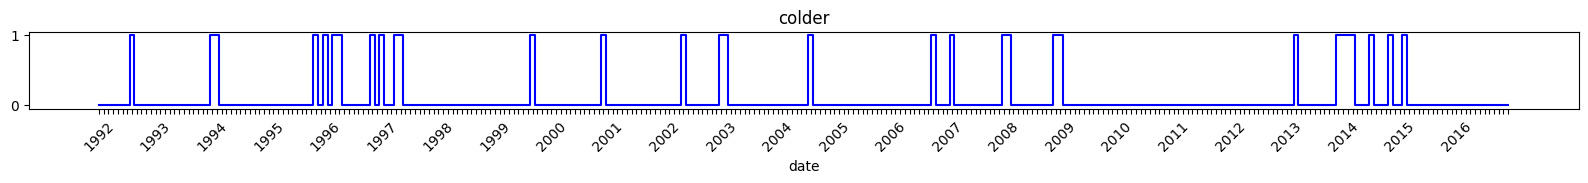

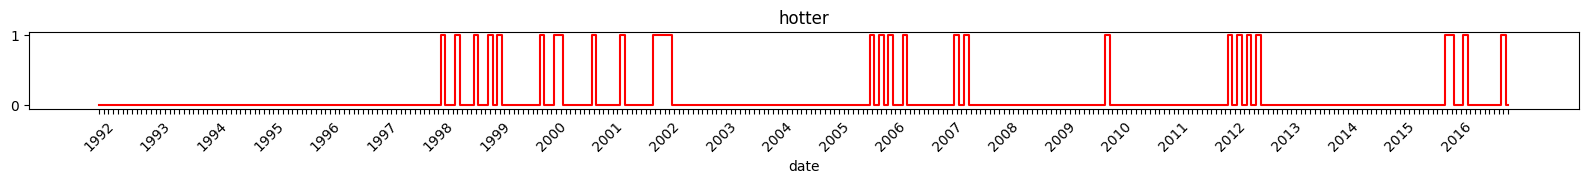

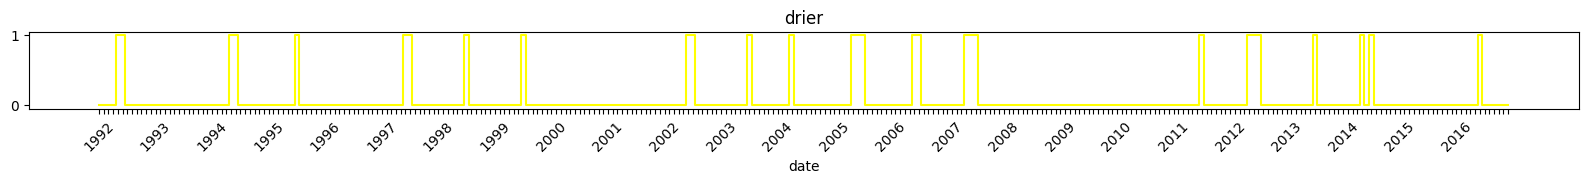

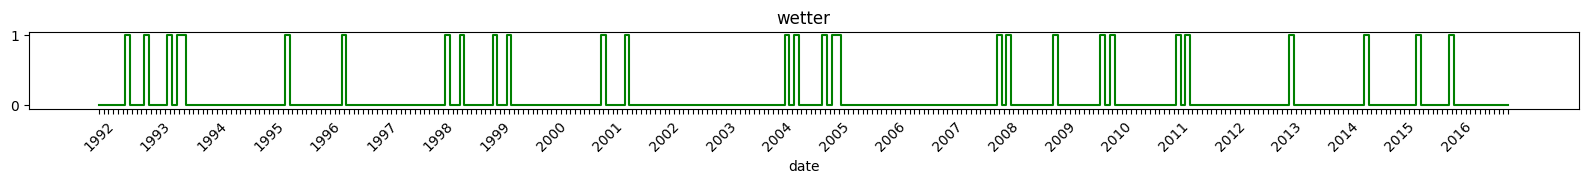

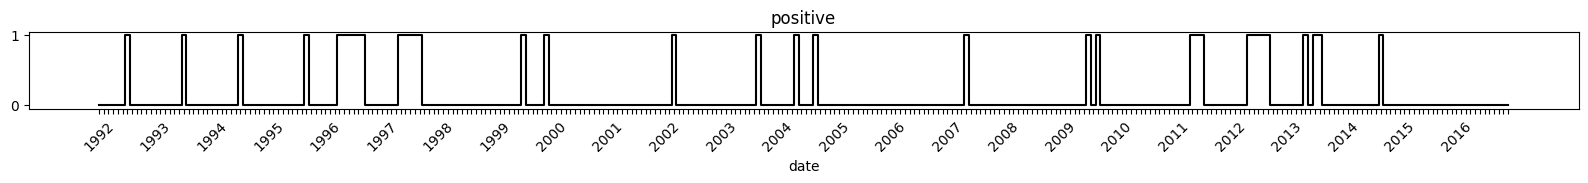

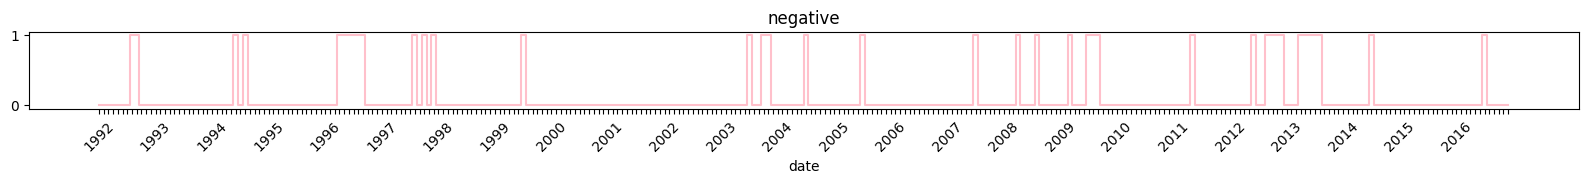

In [67]:
plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["colder"], where='mid', color='blue')
plt.xlabel("date")
plt.title("colder")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["hotter"], where='mid', color='red')
plt.xlabel("date")
plt.title("hotter")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["drier"], where='mid', color='yellow')
plt.xlabel("date")
plt.title("drier")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["wetter"], where='mid', color='green')
plt.xlabel("date")
plt.title("wetter")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prices["DATE"], prices["positive"], where='mid', color='black')
plt.xlabel("date")
plt.title("positive")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prices["DATE"], prices["negative"], where='mid', color='pink')
plt.xlabel("date")
plt.title("negative")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)
plt.show()


In [75]:
from sklearn.linear_model import LinearRegression
modelP = LinearRegression()
modelN = LinearRegression()
X = weather[['hotter', 'colder', 'wetter', 'drier']]
yP = prices['positive']
yN = prices['negative']
modelP.fit(X, yP)
modelN.fit(X, yN)

positive_predictions = modelP.predict(X)
negative_predictions = modelN.predict(X)
thresholdP = (positive_predictions.max() - positive_predictions.min())/2
thresholdN = (negative_predictions.max() - negative_predictions.min())/2
positive_predictions = (positive_predictions >= thresholdP).astype(int)
negative_predictions = (negative_predictions >= thresholdN).astype(int)

prediction = pd.DataFrame({
    "positive": positive_predictions,
    "negative": negative_predictions,
    "DATE": prices["DATE"],
    "LABEL": prices["LABEL"],
    "MONTH": prices["MONTH"],
    "YEAR": prices["YEAR"]
})

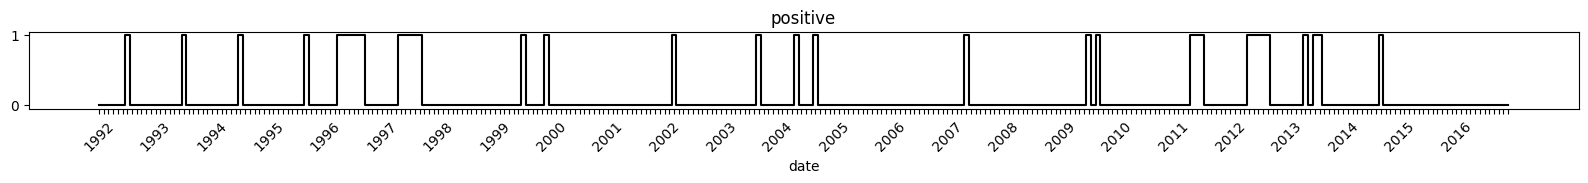

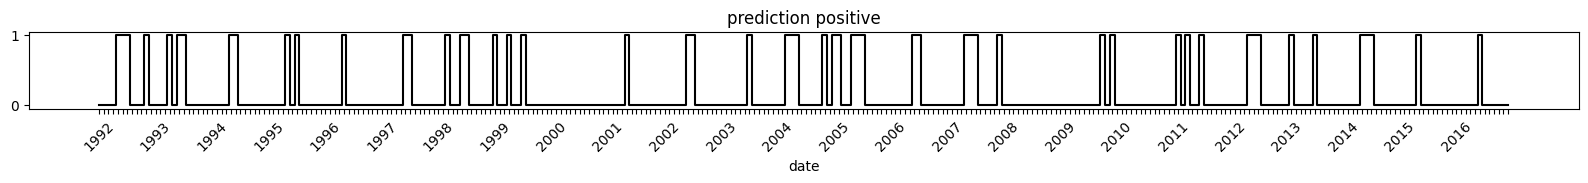

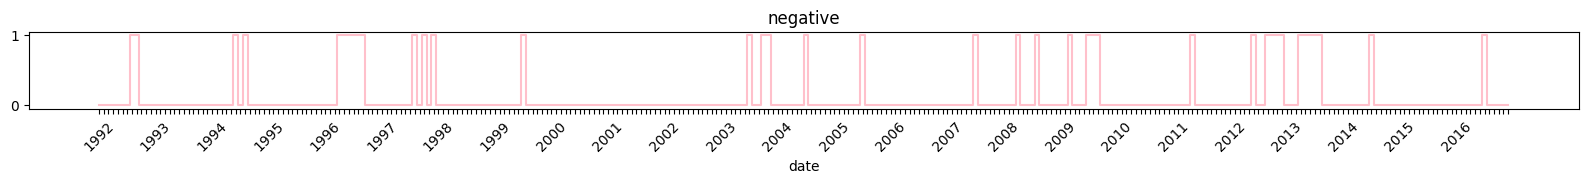

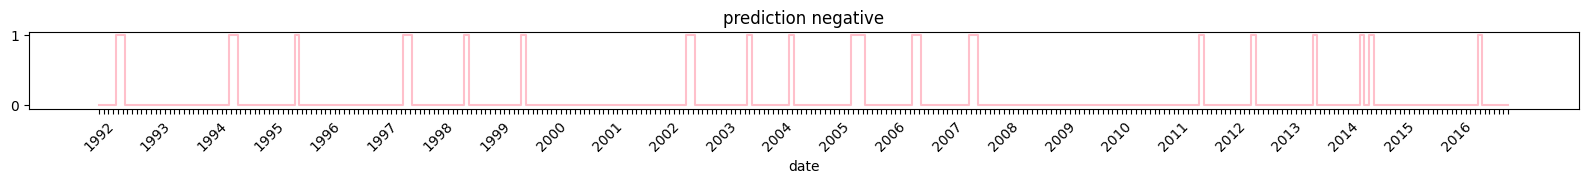

In [76]:
plt.figure(figsize=(20, 1))
plt.step(prices["DATE"], prices["positive"], where='mid', color='black')
plt.xlabel("date")
plt.title("positive")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prediction["DATE"], prediction["positive"], where='mid', color='black')
plt.xlabel("date")
plt.title("prediction positive")
plt.xticks(ticks=range(len(prediction['DATE'])), labels=prediction['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prices["DATE"], prices["negative"], where='mid', color='pink')
plt.xlabel("date")
plt.title("negative")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prediction["DATE"], prediction["negative"], where='mid', color='pink')
plt.xlabel("date")
plt.title("prediction negative")
plt.xticks(ticks=range(len(prediction['DATE'])), labels=prediction['LABEL'], rotation=45)
plt.show()